In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
x = df.iloc[:,0:8]
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [33]:
from keras.utils import np_utils
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=40)


In [37]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="relu"))

model.add(Dense(1,activation='sigmoid'))
validation_data=(xte,yte)

In [38]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
data = model.fit(xtr,ytr,batch_size=10, epochs=150)

Epoch 1/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7076
Epoch 2/150
54/54 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7821
Epoch 3/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7840
Epoch 4/150
54/54 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.7896
Epoch 5/150
54/54 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.7952
Epoch 6/150
54/54 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8138
Epoch 7/150
54/54 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8082
Epoch 8/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8194
Epoch 9/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8175
Epoch 10/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8436
Epoch 11/

In [40]:
print(data.history.keys())

dict_keys(['loss', 'accuracy'])


In [41]:
score = model.evaluate(xte,yte,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 3.2375 - accuracy: 0.6883
[3.237534761428833, 0.6883116960525513]


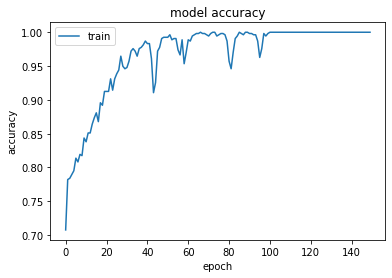

In [42]:
plt.plot(data.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

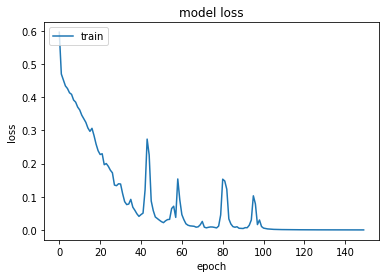

In [43]:
plt.plot(data.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()